Credits/Course URL - https://www.udemy.com/course/the-ultimate-beginners-guide-to-natural-language-processing/

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import en_core_web_sm
import random
import re
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer

### Sentiment Analysis using Twitter Data

In [2]:
tweets = pd.read_csv('Datasets/tweets.csv', 
                     low_memory=False, 
                     encoding = 'latin1', 
                     header=None,
                     names=['sentiment', 'id', 'date', 'query', 'user', 'text'])

In [3]:
tweets.head()

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
tweets['sentiment'].value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64

In [6]:
tweets_processed = tweets.copy(deep=True)

In [7]:
tweets_processed = tweets_processed.drop(['id', 'date', 'query', 'user'], axis = 1)

In [8]:
tweets_processed.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [9]:
X_ = tweets_processed['text'].values
y_ = tweets_processed['sentiment'].values

In [10]:
X, X_, y, y_ = train_test_split(X_, y_, test_size=0.90, random_state=42)

In [11]:
X.shape, y.shape

((160000,), (160000,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
X_train.shape, y_train.shape

((120000,), (120000,))

In [14]:
X_test.shape, y_test.shape

((40000,), (40000,))

In [15]:
np.unique(y_train, return_counts=True)

(array([0, 4]), array([59903, 60097]))

In [16]:
np.unique(y_test, return_counts=True)

(array([0, 4]), array([20132, 19868]))

In [17]:
nlp = spacy.load('en_core_web_sm')
nlp

In [18]:
def preprocessing(sentence):
    
    sentence = sentence.lower()
    sentence = re.sub(r"@[A-Za-z0-9]+", '', sentence)
    sentence = re.sub(r"https?://[A-Za-z0-9/.-]+", '', sentence)
    sentence = sentence.replace('.', '')
    sentence = sentence.replace('[', '')
    sentence = sentence.replace(']', '')
    
    tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
    
    tokens = ' '.join(tokens)
    return tokens

In [19]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [20]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [21]:
for cnt in range(10):
    print(X_train_cleaned[random.randint(0, len(X_train_cleaned)-1)])

technology great luv bed potatoe concept fact crawled bed nighty night
great luv outrage tell lol
today looks terrible spot like inspection coldsore
driving dodgeville jayme casey crashing grad parties
rabbits know inflict pain
forget sale ends today order twitter friends cheaptweet
pretty tired going lay text
brendon
talking year old son phone sooooooo cute miss kids
tried talking ignores mehow love thank


In [22]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

In [23]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

great hats green picture green help find answer
miss able visit twitter work time outlets way day
hey complained cooking kills eat given veggiephobic
wild_man good day bro
cousin house
mason tyler musso love world worst know
worry order finish amp;$(% magazine need material layout
sorted hope
tutorial tomorrow bummed apparently barstow showing face :o



In [36]:
for cnt in range(10):
    print(X_test_cleaned[random.randint(0, len(X_test_cleaned)-1)])

famous words lol
lots fun tell went
got driving lesson minutes nervous
got work tired messing online
fun fun busy
currently watching love bread tube ariel lin joe cheng looks cute
morning
henrie love â¥ hope someday visit chile
9more minutez queen sleep time important tweetz
listening fearless


In [37]:
X_train_cleaned[:5]

['bellachica ok lol feel bigger ugh gon na cook',
 'glasses hot girls',
 'time bike 2day lousy day',
 'wow â£155 administration charge having good day bloody hidden charges',
 'too- unfortunately nt magically transported nineties hoped']

In [38]:
X_train_cleaned_concatd = ' '.join(X_train_cleaned)

In [ ]:
X_test_cleaned_concatd = ' '.join(X_test_cleaned)

### Wordcloud

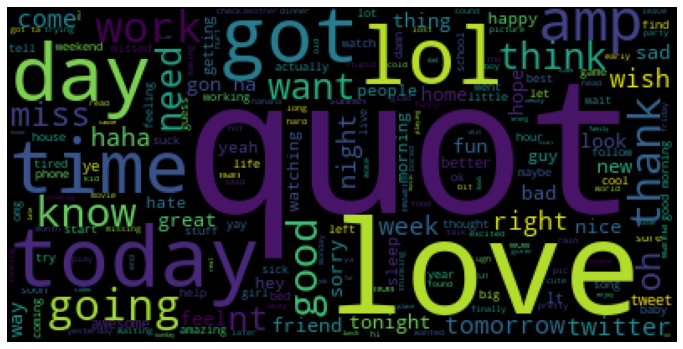

In [ ]:
word_cloud = WordCloud()
word_cloud = word_cloud.generate(X_train_cleaned_concatd)

plt.figure(figsize=(12,12))
plt.imshow(word_cloud)
plt.axis('off');

### Detecting Laguages

In [ ]:
detect('lets see which language is this!')

'en'

In [ ]:
#lang_X_train = [detect(langu) for langu in X_train_cleaned if langu]

lang_X_train = []

for index, tweet in enumerate(X_train_cleaned):
    try:
        if len(tweet) != 0:
            lang = detect(tweet)
            lang_X_train.append(lang)
        else:
            lang_X_train.append('EMPTY TWEET')
    except:
        print(f"Exception Encountered at position {index}: {tweet}")        
        lang_X_train.append('UNKNOWN LANG : '+ str(tweet))
        pass

Exception Encountered at position 17775: 4:30
Exception Encountered at position 79561: 12:28


In [ ]:
np.unique(lang_X_train, return_counts=True)

(array(['EMPTY TWEET', 'UNKNOWN LANG : 12:28', 'UNKNOWN LANG : 4:30', 'af',
        'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr', 'hr',
        'hu', 'id', 'it', 'ko', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi'], dtype='<U20'),
 array([  808,     1,     1,  6707,   773,   207,  2030,  1547,   312,
        84991,   704,  1508,   725,  1802,   325,   121,  1166,  1307,
            2,   114,    73,  2251,  1912,   702,   336,   814,   334,
          428,  3584,   266,   880,   643,  2076,   395,   155]))

In [ ]:
nltk_sentiment_classifier = SentimentIntensityAnalyzer()

In [ ]:
nltk_sentiment_classifier.polarity_scores('I love India')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

In [ ]:
nltk_sentiment_classifier.polarity_scores('I hate origano')

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [39]:
nltk_sentiment_classifier.polarity_scores('I will got to market')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

### Sentiment Analysis using TF-IDF

In [41]:
X_train_cleaned[:10]

['bellachica ok lol feel bigger ugh gon na cook',
 'glasses hot girls',
 'time bike 2day lousy day',
 'wow â£155 administration charge having good day bloody hidden charges',
 'too- unfortunately nt magically transported nineties hoped',
 'great post return favor btw design skills slickvery vimeo twitter',
 'migraine hell going bed',
 'gives quot;up&quot solid quot;a&quot outstanding film sentimentalists theretake tissue pixar rules',
 'flybot kinda yeah gimp pretty close photoshop camera crap use pics',
 'love twitter like little news channel haha awake amd dad nt called']

In [47]:
del X_train_cleaned[17775]
del X_train_cleaned[79561]

In [46]:
indexes = np.array([17775,79561])
y_train = np.delete(y_train, indexes, axis=0)

In [49]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned))

In [50]:
X_train_tfidf.shape

(119998, 69352)

In [51]:
vectorizer.get_feature_names_out()

array(['00', '000', '000k', ..., 'ø³ù', 'ø¹ø', 'ø¹ù'], dtype=object)

In [52]:
def preprocess_lemma(sentence):
    nlp = spacy.load('en_core_web_sm')
    tokens = [tok.lemma_ for tok in nlp(sentence)]
    tokens = ' '.join(tokens)
    return tokens

In [53]:
preprocess_lemma('learn learned learning askg en espo')

'learn learn learn askg en espo'

In [54]:
X_train_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_train_cleaned]

KeyboardInterrupt: 

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(np.array(X_train_cleaned_lemma))

In [ ]:
X_train_tfidf.shape

In [ ]:
X_test_cleaned_lemma = [preprocess_lemma(tweet) for tweet in X_test_cleaned]

In [ ]:
X_test_tfidf = vectorizer.transform(np.array(X_test_cleaned_lemma))

In [ ]:
X_test_tfidf.shape